## Import related functions

In [1]:
import sys
sys.path.append(r'./script/')
from get_dataset_and_analysis import *

### input and output file

In [2]:
# mkdir data_folder & figures_folder
data_folder = "./DATA"
figures_folder = os.path.join(data_folder, "figures")

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

In [3]:
basic_data_folder = "./basic_data"

uniprot_data_file = os.path.join(data_folder, "UniProt_reviewed_0724.tsv")
dataset_outfile = os.path.join(data_folder, "Dataset_0724.csv")

subunit_num_distribution_png = os.path.join(data_folder, "figures", "subunit_num_distribution_reviewed_0725.png")
label_length_distribution_png = os.path.join(data_folder, "figures", "label_length_distribution_reviewed_0725.png")

entry_EC_file = os.path.join(basic_data_folder, "Entry-EC-reviewed.tsv")
ec_subunit_num_ratio_png = os.path.join(data_folder, "figures", "ec_subunit_num_ratio_0725.png")
ec_subunit_num_heatmap_png = os.path.join(data_folder, "figures", "ec_subunit_num_heatmap_0725.png")

### Download UniProt-reviewed data

In [4]:
url = "https://rest.uniprot.org/uniprotkb/stream?fields=accession%2Ccc_subunit%2Clength%2Csequence%2Cec&format=tsv&query=%28reviewed%3Atrue%29"

download_uniprot_data(url, uniprot_data_file)

Data saved to ./DATA/UniProt_reviewed_0724.tsv


### Get dataset from UniProt

In [5]:
get_dataset_from_uniprot(uniprot_data_file, dataset_outfile)

/home/huangyy/enter/envs/py37/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Done
(114808, 3)


### Dataset distribution

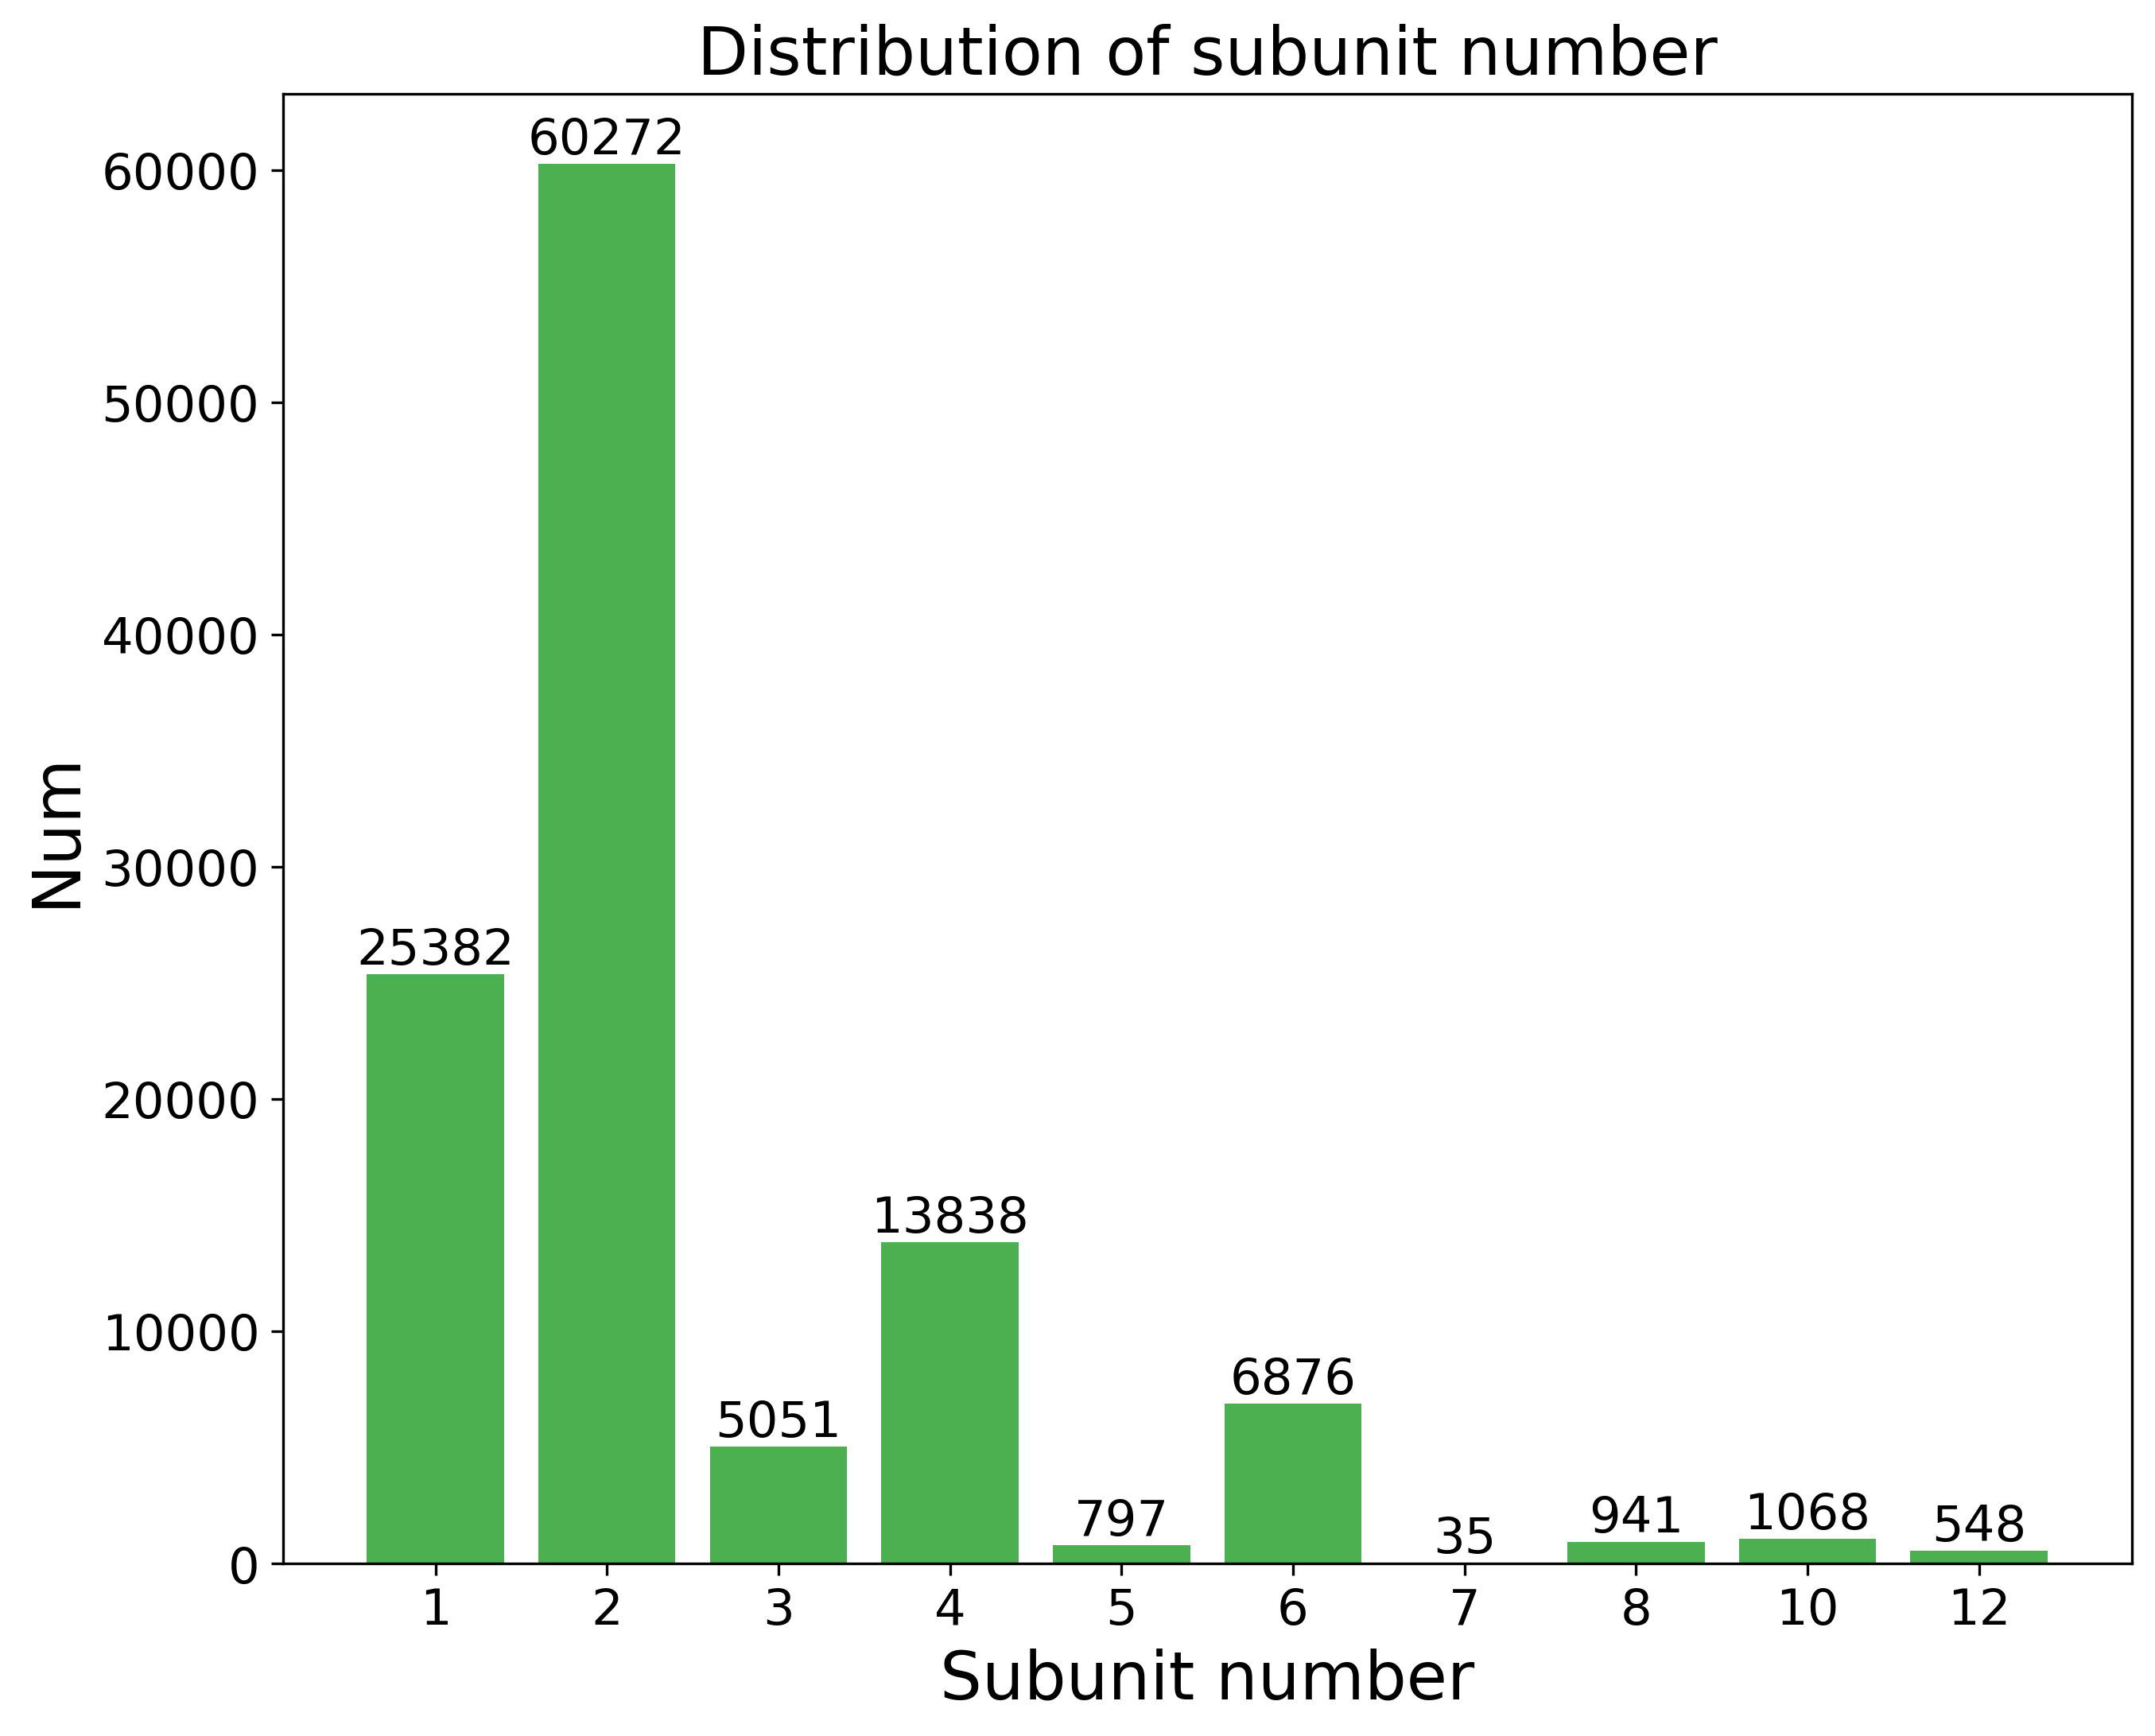

In [6]:
get_dataset_distribution(dataset_outfile, subunit_num_distribution_png)

### label-length

<Figure size 3000x3000 with 0 Axes>

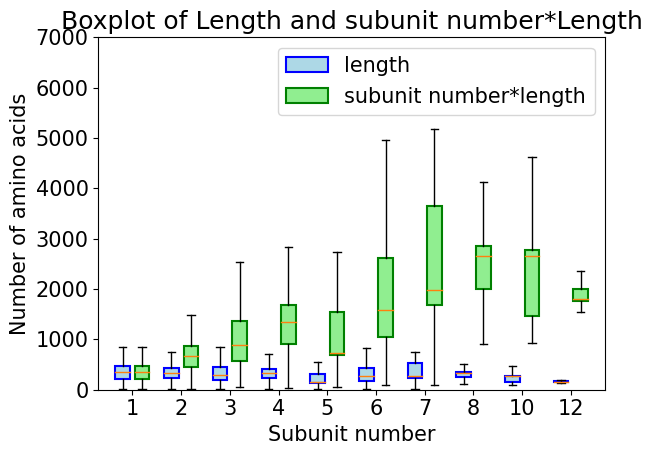

In [7]:
get_label_length_distribution(dataset_outfile, label_length_distribution_png)

### EC分布

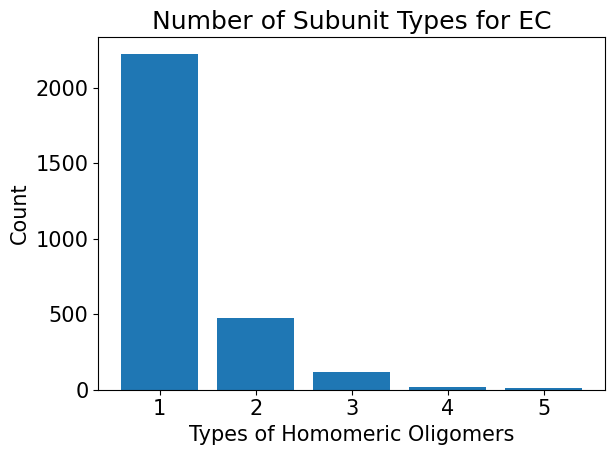

In [8]:
get_ec_subunit_num_ratio(dataset_outfile,entry_EC_file,ec_subunit_num_ratio_png)

./script/get_dataset_and_analysis.py:348: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EC_group'] = data['EC number'].apply(lambda x: x[0])


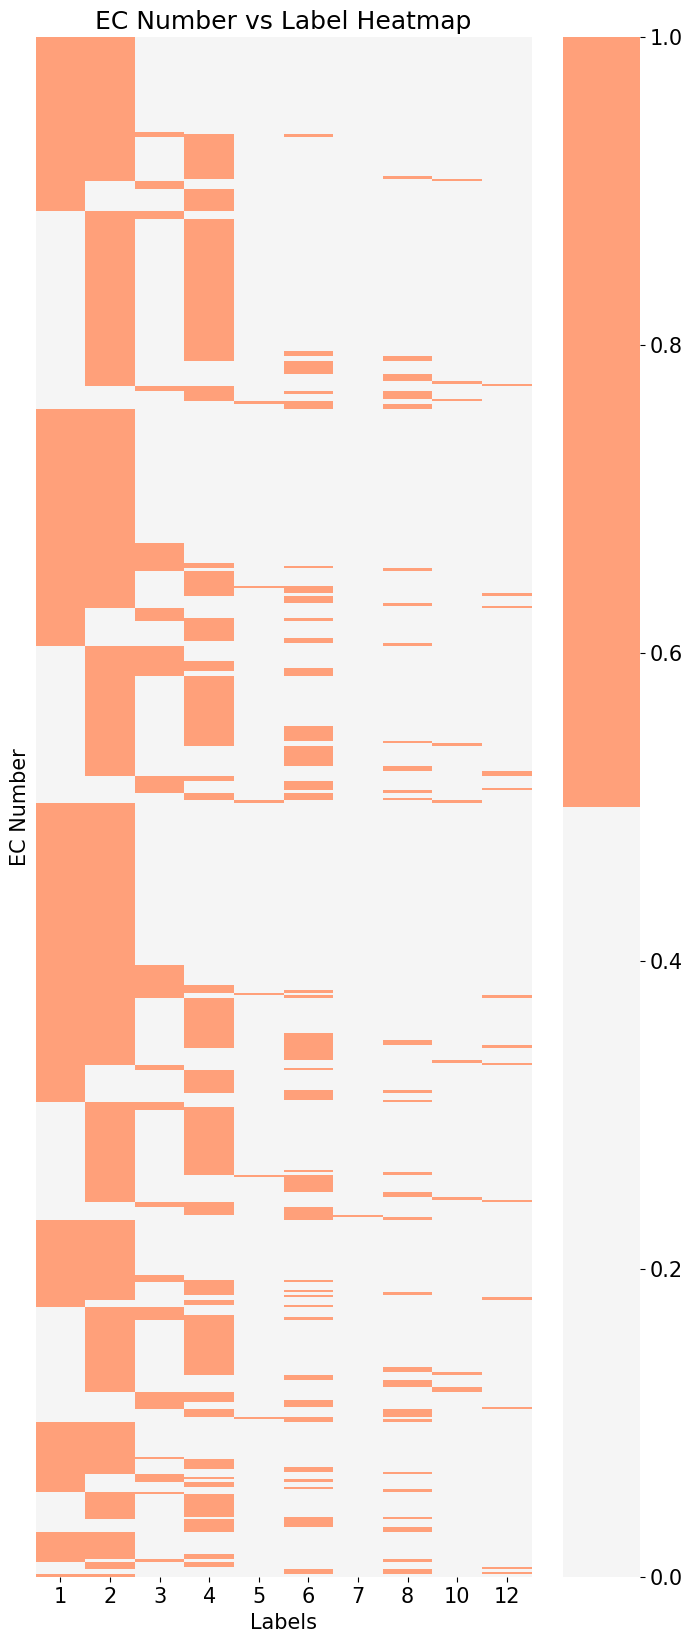

In [9]:
get_ec_subunit_num_heatmap(dataset_outfile,entry_EC_file,ec_subunit_num_heatmap_png)